# ISOM5160 Project - Group7

- **Dataset:** amazon_food_reviews.csv
- **Topic:** AI Driven Personalized Product Improvement Recommendation System for Amazon Sellers
- **Individual Contribution:**

    | Name          | SID      | Contributions                                                                                                          |
    |---------------|----------|------------------------------------------------------------------------------------------------------------------------|
    | CAO, Xi       | 21271664 | 评论文本预处理 + 情感分析 + 评论关键词提取 +数据清洗                                                                                                 |
    | LI, Heyi      |          | 评论、评分异常值分析 （基于评论情感分析）、 PPT 统筹                                                                                          |
    | LIAO, Jingyu  | 21262106 | 差评原因分析   （基于评论关键词）                                                                                                     |
    | LIN, Chuwei   |          | 评分时间趋势分析                                                                                                               |
    | YE, Chenwei   | 21199517 | 用户评论权重分析                                                                                                               |
    | ZHANG, Ziyang | 21266920 | 1. Data scraping: additional amazon product info <br/>2. Analyse: Correlation Between Ratings and Product Descriptions |



## 0. Install requirements and do initialization
1. Install requirements and load 'amazon_food_reviews.csv'
2. Scrape product info from *amazon.com*
3. Load product info and concat to original dataset

In [99]:
# Run first to install requirements
!pip install -r requirements.txt

# Run this to speed up the data scraping process
!unzip -oq new_data.zip

  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached bs4-0.0.2-py2.py3-none-any.whl.metadata (411 bytes)
  Using cached beautifulsoup4-4.13.5-py3-none-any.whl.metadata (3.8 kB)
  Using cached regex-2024.9.11-cp313-cp313-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.66.6-py3-none-any.whl.metadata (57 kB)
  Using cached matplotlib-3.9.4-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached transformers-4.44.2-py3-none-any.whl.metadata (43 kB)
  Using cached huggingface_hub-0.35.3-py3-none-any.whl.metadata (14 kB)
  Using cached safetensors-0.6.2-cp38-abi3-win_amd64.whl.metadata (4.1 kB)
  Using cached tokenizers-0.19.1.tar.gz (321 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [23 lines of output]
      Checking for Rust toolchain....
      Rust not found, installing into a temporary directory
      Python reports SOABI: cp313-win_amd64
      Computed rustc target triple: x86_64-pc-windows-msvc
      Installation directory: C:\Users\Stan\AppData\Local\puccinialin\puccinialin\Cache
      Rustup already downloaded
      Installing rust to C:\Users\Stan\AppData\Local\puccinialin\puccinialin\Cache\rustup
      warn: It looks like you have an existing rustup settings file at:
      warn: C:\Users\Stan\.rustup\settings.toml
      warn: Rustup will install the default toolchain as specified in the settings file,
      warn: instead of the one inferred from the default host triple.
      warn: installing msvc toolchain without its prerequisites
      info: profile set to 'minimal'
      info: default host triple is x86_64-pc-windows-msvc


In [100]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

from amazon_new_data_scraping import parallel_scrape_amazon_product_info, load_all_data_as_dataframe, \
    extract_comments_from_product_info

df_amazon_food_reviews = pd.read_csv('amazon_food_reviews.csv',
                                     converters={"Time": lambda x: pd.to_datetime(int(x), unit="s")})

In [101]:
product_id_list = list(df_amazon_food_reviews.ProductId.unique())
print(f"Total number of products: {len(product_id_list)}")
print("Start scraping data...")
parallel_scrape_amazon_product_info(product_id_list, replace=False)
print("Scraping finished.")
df_amazon_product_info = load_all_data_as_dataframe()
print("Product info loaded.")
df_amazon_product_info

Total number of products: 4322
Start scraping data...
Using 18 CPU cores for parallel scraping


Scraping amazon products: 100%|██████████| 4322/4322 [00:03<00:00, 1189.51it/s]


Successfully scraped 4322/4322 products
Scraping finished.


Loading product info: 100%|██████████| 4322/4322 [00:00<00:00, 10949.55it/s]


Product info loaded.


,product_id,product_title,byline_info,product_description,category,alt_images,product_detail,important_information,top_comments,CountAltImages,Score,ScoreDistribution,ScorePolarizationIndex,NumRatings,IsFood
0,new_data\7310172001,Stewart Single Ingredient Freeze Dried Raw Dog...,Visit the Stewart Store,"A healthy dog is a happy dog, and a happy you!...","[Pet Supplies, Dogs, Treats, Cookies, Biscuits...",[https://m.media-amazon.com/images/I/41pz-O8oo...,"{'Is Discontinued By Manufacturer': 'No', 'Pro...",{},"[{'date': 'September 25, 2025', 'title': 'Qual...",7,4.4,"[6.0, 4.0, 8.0, 9.0, 73.0]",0.311897,3886,False
1,new_data\7310172101,Stewart Single Ingredient Freeze Dried Raw Dog...,Visit the Stewart Store,"A healthy dog is a happy dog, and a happy you!...","[Pet Supplies, Dogs, Treats, Cookies, Biscuits...",[https://m.media-amazon.com/images/I/41DbFfxn6...,"{'Is Discontinued By Manufacturer': 'No', 'Pro...",{},"[{'date': 'September 25, 2025', 'title': 'Qual...",7,4.4,"[6.0, 4.0, 8.0, 9.0, 73.0]",0.311897,3886,False
2,new_data\B00004RAMX,Victor Easy Set Gopher Trap 0610 - Weather-res...,Visit the Victor Store,The Victor Easy Set Gopher Trap effectively ki...,"[Patio, Lawn & Garden, Pest Control, Traps]",[https://m.media-amazon.com/images/I/41AtE5SCw...,{},{'Directions': 'Victor Easy Set Gopher Trap 06...,"[{'date': 'February 3, 2021', 'title': 'I'm 2/...",6,3.9,"[14.0, 6.0, 10.0, 13.0, 57.0]",0.348112,-1,False
3,new_data\B00004RAMY,Victor 0631 Out O'Sight Reusable Humane Mole E...,Visit the Victor Store,Get rid of destructive moles and protect your ...,"[Patio, Lawn & Garden, Pest Control, Traps]",[https://m.media-amazon.com/images/I/51X8AE1p2...,{},{},"[{'date': 'November 6, 2014', 'title': 'I loca...",2,3.5,"[19.0, 8.0, 15.0, 15.0, 43.0]",0.305263,-1,False
4,new_data\B00004RBDW,TERRO T380 Outdoor Reusable Fly Magnet Fly Tra...,Visit the Terro Store,Flies are an ever-present nuisance around home...,"[Patio, Lawn & Garden, Pest Control, Traps]",[https://m.media-amazon.com/images/I/41ecsqa4Z...,{},{},"[{'date': 'July 22, 2025', 'title': 'It works!...",7,4.2,"[9.0, 4.0, 9.0, 13.0, 65.0]",0.323871,-1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,new_data\B000GZY8FC,"Solo Filling, Poppy Seed, 12.5 Ounce (Pack of 12)",Visit the SOLO Store,For incredible desserts! Making scrumptious de...,"[Grocery & Gourmet Food, Pantry Staples, Herbs...",[https://m.media-amazon.com/images/I/51SAPAGN7...,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",{'Safety Information': 'Made in a facility tha...,"[{'date': 'April 13, 2022', 'title': 'Perfect ...",1,4.6,"[4.0, 2.0, 2.0, 7.0, 85.0]",0.232159,298,True
1661,new_data\B000GZY96K,Near East Toasted Pine Nut Couscous Mix 5.6 oz...,Visit the Near East Store,Near East Toasted Pine Nut Couscous Mix 5.6 oz,"[Grocery & Gourmet Food, Pantry Staples, Dried...",[https://m.media-amazon.com/images/I/51-PSri5r...,"{'Is Discontinued By Manufacturer': 'No', 'Pro...",{},"[{'date': 'August 7, 2013', 'title': 'Yummy!',...",7,4.6,"[4.0, 0.0, 8.0, 5.0, 83.0]",0.249665,75,True
1662,new_data\B000GZY9HY,"Fantastic World Foods Taco Filling, Quick Vege...",Brand: Fantastic World Foods,Product Description Quick vegetarian mix. Ne...,"[Grocery & Gourmet Food, Meat Substitutes, Mea...",[https://m.media-amazon.com/images/I/51WXT9IZ7...,{'Package Dimensions': '14 x 8.2 x 6.3 inches;...,{'Safety Information': 'Contains Soy and Wheat...,"[{'date': 'June 4, 2011', 'title': 'FANTASTICA...",1,4.4,"[2.0, 2.0, 13.0, 16.0, 67.0]",0.251249,68,True
1663,new_data\B000GZYAN2,"No Pudge! Fat Free Fudge Brownie Mix, Original...",Visit the No Pudge! Store,No Pudge! Fat Free Fudge Brownies Mixes are th...,"[Grocery & Gourmet Food, Pantry Staples, Cooki...",[https://m.media-amazon.com/images/I/61wCBjIw5...,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",{'Safety Information': 'This product is labell...,"[{'date': 'July 9, 2016', 'title': 'Delish!', ...",7,4.6,"[4.0, 2.0, 5.0, 10.0, 79.0]",0.253559,776,True


In [102]:
# Concat new reviews to the original dataset and drop duplicates
df_amazon_food_reviews = pd.concat([df_amazon_food_reviews, extract_comments_from_product_info(df_amazon_product_info)]
                                   ).drop_duplicates(['Score', 'Time', 'Summary']).reset_index(drop=True)
df_amazon_food_reviews

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,350.0,B00067AD4U,A2LYOWC3FC73XK,"Michael Ekstrum """"expresso bean fan""""",1,1.0,5,2007-05-12,excellent - exactly what I expected,The product was exactly as advertised and fres...
1,439.0,B000G6RYNE,A926YP1BSD72Y,Shopper11,0,0.0,5,2011-11-20,Best gluten-free dairy-free chips,These are my favorite gluten-free dairy-free f...
2,446.0,B000G6RYNE,A19G8B2QYETD7W,NyahNyah,0,0.0,3,2011-02-13,Heavy on the Vinegar,"I usually love Kettle Chips, and love salt & v..."
3,448.0,B000G6RYNE,ACFPHOYVB71V4,karob,0,0.0,5,2010-12-18,BEST BUY in BBQ Chips,Tried many varieties of BBQ chips and hands do...
4,452.0,B000G6RYNE,A2MUGFV2TDQ47K,"Lynrie """"Oh HELL no""""",0,0.0,3,2010-11-05,An Acquired Taste,"OK,I did read the reviews which ranged from sp..."
...,...,...,...,...,...,...,...,...,...,...
19650,NaN,new_data\B000GZYARS,NaN,NaN,1,NaN,5,2021-03-07,Can be used in place of milk products,I use this all the time in place of milk produ...
19651,NaN,new_data\B000GZYARS,NaN,NaN,3,NaN,4,2023-07-13,No sugar so great for coffee when avoiding sug...,Coffee
19652,NaN,new_data\B000GZYARS,NaN,NaN,0,NaN,1,2025-03-07,Dented cans,In the box of 12 9 were dented - and there is ...
19653,NaN,new_data\B000GZYARS,NaN,NaN,1,NaN,5,2015-02-19,A good home shampoo ingredient!,This product seemed to be the best for what I ...


## 3.Review weight analysis

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========== 0) 输入与准备 ==========
cols = ['ProductId', 'Score', 'HelpfulnessNumerator', 'HelpfulnessDenominator']
reviews = df_amazon_food_reviews[cols].copy()

# 1.1 简单权重：纯 Numerator（给0票一个最小权重，避免全0）
reviews['weight_simple'] = reviews['HelpfulnessNumerator'].fillna(0).clip(lower=0)
reviews.loc[reviews['weight_simple'] == 0, 'weight_simple'] = 1.0

# 1.2 平滑权重：平滑有用率 × 投票强度
a = b = 1.0
r = (reviews['HelpfulnessNumerator'] + a) / (reviews['HelpfulnessDenominator'] + a + b)
t = 1 + np.log1p(reviews['HelpfulnessDenominator'])
reviews['weight_smooth'] = r * t

# 护栏：避免极端权重
reviews['weight_smooth'] = reviews['weight_smooth'].clip(lower=0.05, upper=10)




In [104]:
# 主聚合
reviews['wscore_simple'] = reviews['Score'] * reviews['weight_simple']
reviews['wscore_smooth'] = reviews['Score'] * reviews['weight_smooth']

agg_main = (reviews
    .groupby('ProductId', as_index=False)
    .agg(
        mean_score=('Score', 'mean'),               
        num_reviews=('Score', 'size'),
        # simple 权重汇总
        sum_weight_simple=('weight_simple', 'sum'),
        sum_wscore_simple=('wscore_simple', 'sum'),
        # smooth 权重汇总
        sum_weight_smooth=('weight_smooth', 'sum'),
        sum_wscore_smooth=('wscore_smooth', 'sum'),
    )
)

# 1) 计算加权均分（防 0 分母）
agg_main['weighted_mean_simple'] = np.where(
    agg_main['sum_weight_simple'] > 0,
    agg_main['sum_wscore_simple'] / agg_main['sum_weight_simple'],
    np.nan
)
agg_main['weighted_mean_smooth'] = np.where(
    agg_main['sum_weight_smooth'] > 0,
    agg_main['sum_wscore_smooth'] / agg_main['sum_weight_smooth'],
    np.nan
)

# 2) 贝叶斯修正（给 m 设置下限，防 0/NaN）
global_mean = reviews['Score'].mean()
m = agg_main['sum_weight_smooth'].median()
m = np.nan_to_num(m, nan=0.0)
m = max(m, 1e-6)

agg_main['bayesian_mean_smooth'] = (
    (m * global_mean + agg_main['weighted_mean_smooth'] * agg_main['sum_weight_smooth']) /
    (m + agg_main['sum_weight_smooth'])
)

m_simple = agg_main['sum_weight_simple'].median()
m_simple = np.nan_to_num(m_simple, nan=0.0)
m_simple = max(m_simple, 1e-6)

agg_main['bayesian_mean_simple'] = (
    (m_simple * global_mean + agg_main['weighted_mean_simple'] * agg_main['sum_weight_simple']) /
    (m_simple + agg_main['sum_weight_simple'])
)

# 3) 组装得分表
score_table = agg_main[['ProductId','mean_score','num_reviews',
                        'weighted_mean_simple','weighted_mean_smooth',
                        'bayesian_mean_smooth','bayesian_mean_simple']]

# 4) 合并进产品信息
# 统一键类型，避免 dtype 不一致导致合并失败
try:
    df_amazon_product_info['product_id'] = df_amazon_product_info['product_id'].astype(str)
except Exception:
    pass
try:
    score_table['ProductId'] = score_table['ProductId'].astype(str)
except Exception:
    pass
_metric_cols = ['mean_score','num_reviews','weighted_mean_simple','weighted_mean_smooth',
                'bayesian_mean_smooth','bayesian_mean_simple']
df_amazon_product_info = df_amazon_product_info.drop(columns=[c for c in _metric_cols if c in df_amazon_product_info.columns], errors='ignore')

df_amazon_product_info = df_amazon_product_info.merge(
    score_table, left_on='product_id', right_on='ProductId', how='left'
)
df_amazon_product_info = df_amazon_product_info.drop(columns=['ProductId'], errors='ignore')

# 5) 用 ScoreDistribution 生成星级计数列
from ast import literal_eval

def _parse_score_distribution(x):
    if isinstance(x, (list, tuple, np.ndarray)):
        return list(x)
    if x is None:
        return [0, 0, 0, 0, 0]
    if isinstance(x, str):
        s = x.strip()
        if not s:
            return [0, 0, 0, 0, 0]
        try:
            return list(literal_eval(s))
        except Exception:
            return [0, 0, 0, 0, 0]
    # 标量的 NaN
    try:
        if pd.isna(x):
            return [0, 0, 0, 0, 0]
    except Exception:
        pass
    return [0, 0, 0, 0, 0]

_sd = df_amazon_product_info['ScoreDistribution'].apply(_parse_score_distribution).apply(pd.Series)
_sd.columns = ['count_1star','count_2star','count_3star','count_4star','count_5star']
for c in _sd.columns:
    df_amazon_product_info[c] = pd.to_numeric(_sd[c], errors='coerce').fillna(0).astype(int)

# 6) 数值列清洗与差异列
for c in ['mean_score','weighted_mean_simple','weighted_mean_smooth','bayesian_mean_smooth','bayesian_mean_simple']:
    if c in df_amazon_product_info.columns:
        df_amazon_product_info[c] = pd.to_numeric(df_amazon_product_info[c], errors='coerce')

df_amazon_product_info['diff_smooth_vs_simple'] = (
    df_amazon_product_info['weighted_mean_smooth'] - df_amazon_product_info['weighted_mean_simple']
)
df_amazon_product_info['diff_bayes_vs_mean'] = (
    df_amazon_product_info['bayesian_mean_smooth'] - df_amazon_product_info['mean_score']
)

# 7) 展示
cols_show = [
    'product_id','num_reviews','mean_score',
    'weighted_mean_simple','weighted_mean_smooth','bayesian_mean_smooth',
    'diff_smooth_vs_simple','diff_bayes_vs_mean',
    'count_1star','count_2star','count_3star','count_4star','count_5star'
]
df_amazon_product_info[cols_show].head(10)

C:\Users\Stan\AppData\Local\Temp\ipykernel_16604\1807969139.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_table['ProductId'] = score_table['ProductId'].astype(str)


,product_id,num_reviews,mean_score,weighted_mean_simple,weighted_mean_smooth,bayesian_mean_smooth,diff_smooth_vs_simple,diff_bayes_vs_mean,count_1star,count_2star,count_3star,count_4star,count_5star
0,new_data\7310172001,8.0,4.125000,3.230769,NaN,NaN,NaN,NaN,6,4,8,9,73
1,new_data\7310172101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,4,8,9,73
2,new_data\B00004RAMX,2.0,5.000000,5.000000,NaN,NaN,NaN,NaN,14,6,10,13,57
3,new_data\B00004RAMY,2.0,3.000000,2.769231,NaN,NaN,NaN,NaN,19,8,15,15,43
4,new_data\B00004RBDW,8.0,4.500000,4.784314,NaN,NaN,NaN,NaN,9,4,9,13,65
5,new_data\B00004RYGX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,11,83
6,new_data\B00004S1C5,8.0,3.625000,2.363636,NaN,NaN,NaN,NaN,8,8,16,9,59
7,new_data\B00004S1C6,5.0,3.600000,3.083333,NaN,NaN,NaN,NaN,6,3,8,9,74
8,new_data\B00005344V,8.0,4.875000,4.952941,NaN,NaN,NaN,NaN,2,0,4,9,85
9,new_data\B00005C2M3,7.0,3.714286,1.956522,NaN,NaN,NaN,NaN,8,13,12,16,51


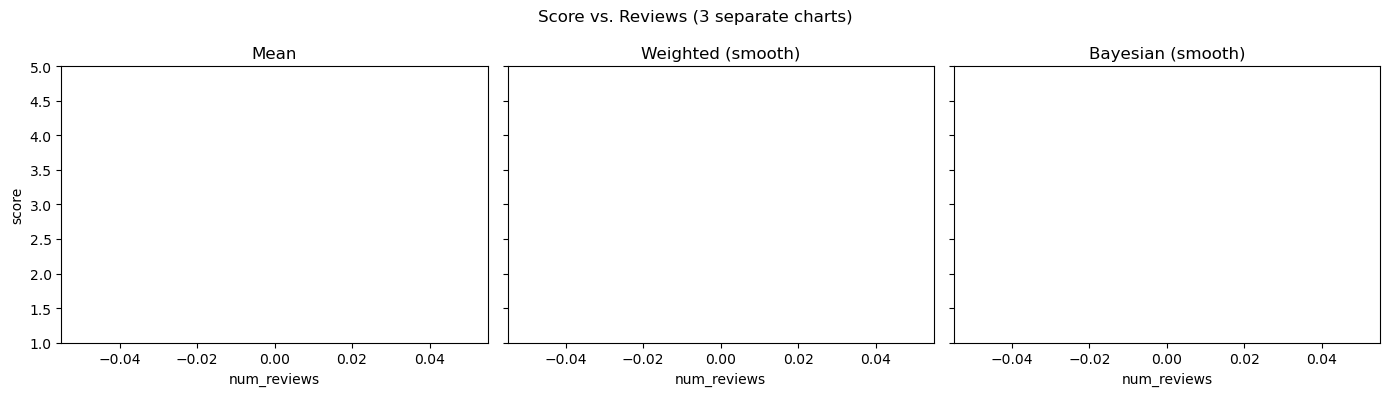

,product_id,num_reviews,mean_score,weighted_mean_simple,weighted_mean_smooth,bayesian_mean_smooth
29,new_data\B00009OLEP,1.0,5.0,5.0,NaN,NaN


,product_id,num_reviews,mean_score,weighted_mean_simple,weighted_mean_smooth,bayesian_mean_smooth


In [105]:
# 可视化
req_cols = ['num_reviews','mean_score','weighted_mean_smooth','bayesian_mean_smooth']
sample_base = df_amazon_product_info.dropna(subset=[c for c in req_cols if c in df_amazon_product_info.columns])
sample = (sample_base
          .query('num_reviews>=5')
          .sample(min(300, len(sample_base)), random_state=42) if len(sample_base) > 0 else sample_base)

fig, axes = plt.subplots(1, 3, figsize=(14,4), sharex=True, sharey=True)
axes[0].scatter(sample['num_reviews'], sample['mean_score'], color='C0', alpha=0.6)
axes[0].set_title('Mean')
axes[1].scatter(sample['num_reviews'], sample['weighted_mean_smooth'], color='C1', alpha=0.6)
axes[1].set_title('Weighted (smooth)')
axes[2].scatter(sample['num_reviews'], sample['bayesian_mean_smooth'], color='C2', alpha=0.8)
axes[2].set_title('Bayesian (smooth)')
for ax in axes:
    ax.set_xlabel('num_reviews')
axes[0].set_ylabel('score')
axes[0].set_ylim(1,5)
plt.suptitle('Score vs. Reviews (3 separate charts)')
plt.tight_layout()
plt.show()

# 两个示例
one_review = df_amazon_product_info.query('num_reviews==1').head(1)
sort_key = 'weighted_mean_smooth' if 'weighted_mean_smooth' in df_amazon_product_info.columns else 'num_reviews'
many_reviews = (df_amazon_product_info.query('num_reviews>=20')
                .sort_values(sort_key, ascending=False)
                .head(1))
display(one_review[cols_show[:6]])
display(many_reviews[cols_show[:6]])

## 4. Correlation Between Ratings and Product Descriptions

### 4.1 Correlation with the number of sample images

Spearman correlation coefficient: 0.3065; P value: 2.5e-34


<Axes: xlabel='CountAltImages'>

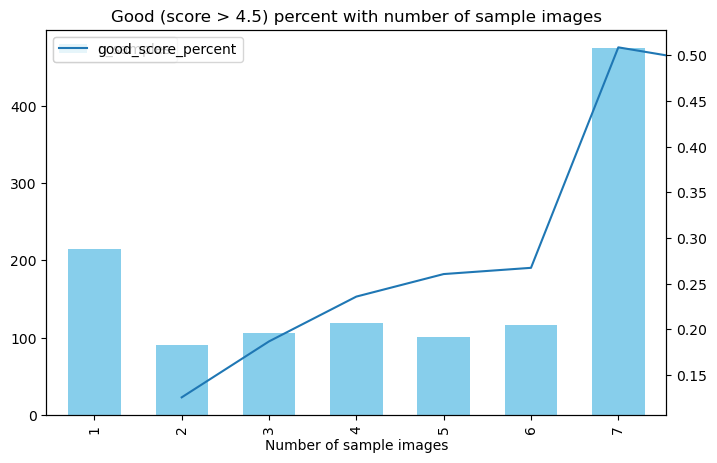

In [106]:
# Compute Spearman's correlation coefficient
tmp = df_amazon_product_info[['Score', 'CountAltImages']].dropna()
corr, p_value = spearmanr(tmp["Score"], tmp["CountAltImages"])

print(f"Spearman correlation coefficient: {corr:.4f}; P value: {p_value:.1e}")

df = df_amazon_product_info[df_amazon_product_info.NumRatings > 10].groupby("CountAltImages").agg(
    good_score_percent=("Score", lambda x: (x > 4.5).mean()), n_samples=("Score", "count"))
ax = df.plot(y='n_samples', kind="bar", color="skyblue", width=0.6, figsize=(8, 5),
             title="Good (score > 4.5) percent with number of sample images", xlabel="Number of sample images")
df.plot(y=['good_score_percent'], ax=ax.twinx())

In [107]:
df_amazon_food_reviews.pivot_table(index=['UserId'], values=['ProductId'], aggfunc='count').sort_values(
    "ProductId", ascending=False)

,ProductId
UserId,
A281NPSIMI1C2R,17
A1YUL9PCJR3JTY,16
A3OXHLG6DIBRW8,10
AXO4PQU0XG3TG,7
AQQLWCMRNDFGI,7
...,...
AZQ6WUGIPFX9Q,1
AZRCVLL7A0ODE,1
AZSE0K98A68HT,1


In [108]:
p = df_amazon_food_reviews.pivot_table(index=['ProductId'], aggfunc='count')[["Summary"]]
p[p.Summary > 1]

,Summary
ProductId,
6641040,3
7310172001,18
7310172101,10
B00002N8SM,3
B00004CI84,22
...,...
new_data\B000GZY8FC,8
new_data\B000GZY96K,8
new_data\B000GZY9HY,8


In [109]:
df_amazon_product_info = df_amazon_product_info[
    df_amazon_product_info.category.apply(lambda x: sum(['food' in e.lower() for e in x])) > 0]


<Axes: xlabel='Score', ylabel='ScorePolarizationIndex'>

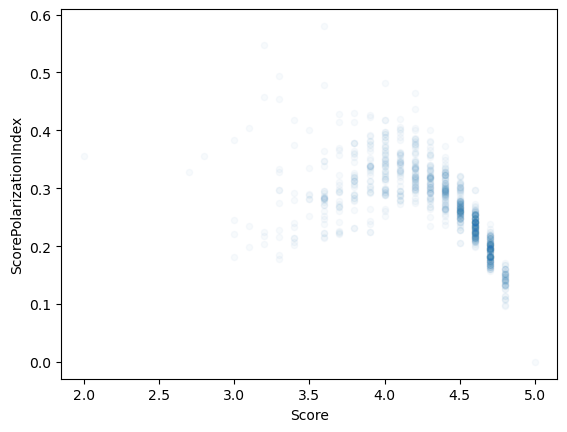

In [110]:
df_amazon_product_info[df_amazon_product_info.NumRatings > 20].plot.scatter(x='Score', y='ScorePolarizationIndex',
                                                                            alpha=0.03)

<Axes: >

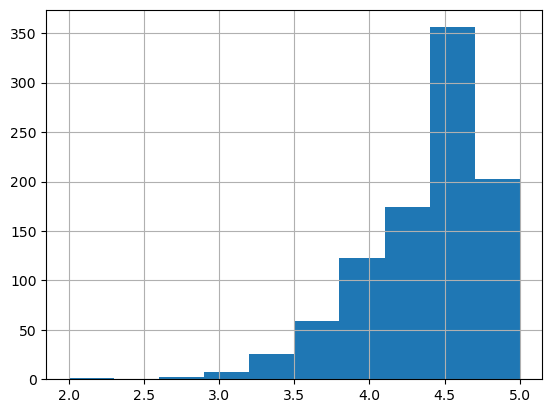

In [111]:
df_amazon_product_info[df_amazon_product_info.NumRatings > 20].Score.hist(bins=10)

Comment Time Series Analysis

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


reviews_df = df_amazon_food_reviews.copy()

# Ensure datetime: handle both integer seconds and existing datetimes
if not np.issubdtype(reviews_df['Time'].dtype, np.datetime64):
    reviews_df['review_date'] = pd.to_datetime(reviews_df['Time'], unit='s', errors='coerce')
else:
    reviews_df['review_date'] = reviews_df['Time']

# Extract year and month for grouping
reviews_df['year'] = reviews_df['review_date'].dt.year
reviews_df['month'] = reviews_df['review_date'].dt.to_period('M')

Monthly Review Volume Over Time

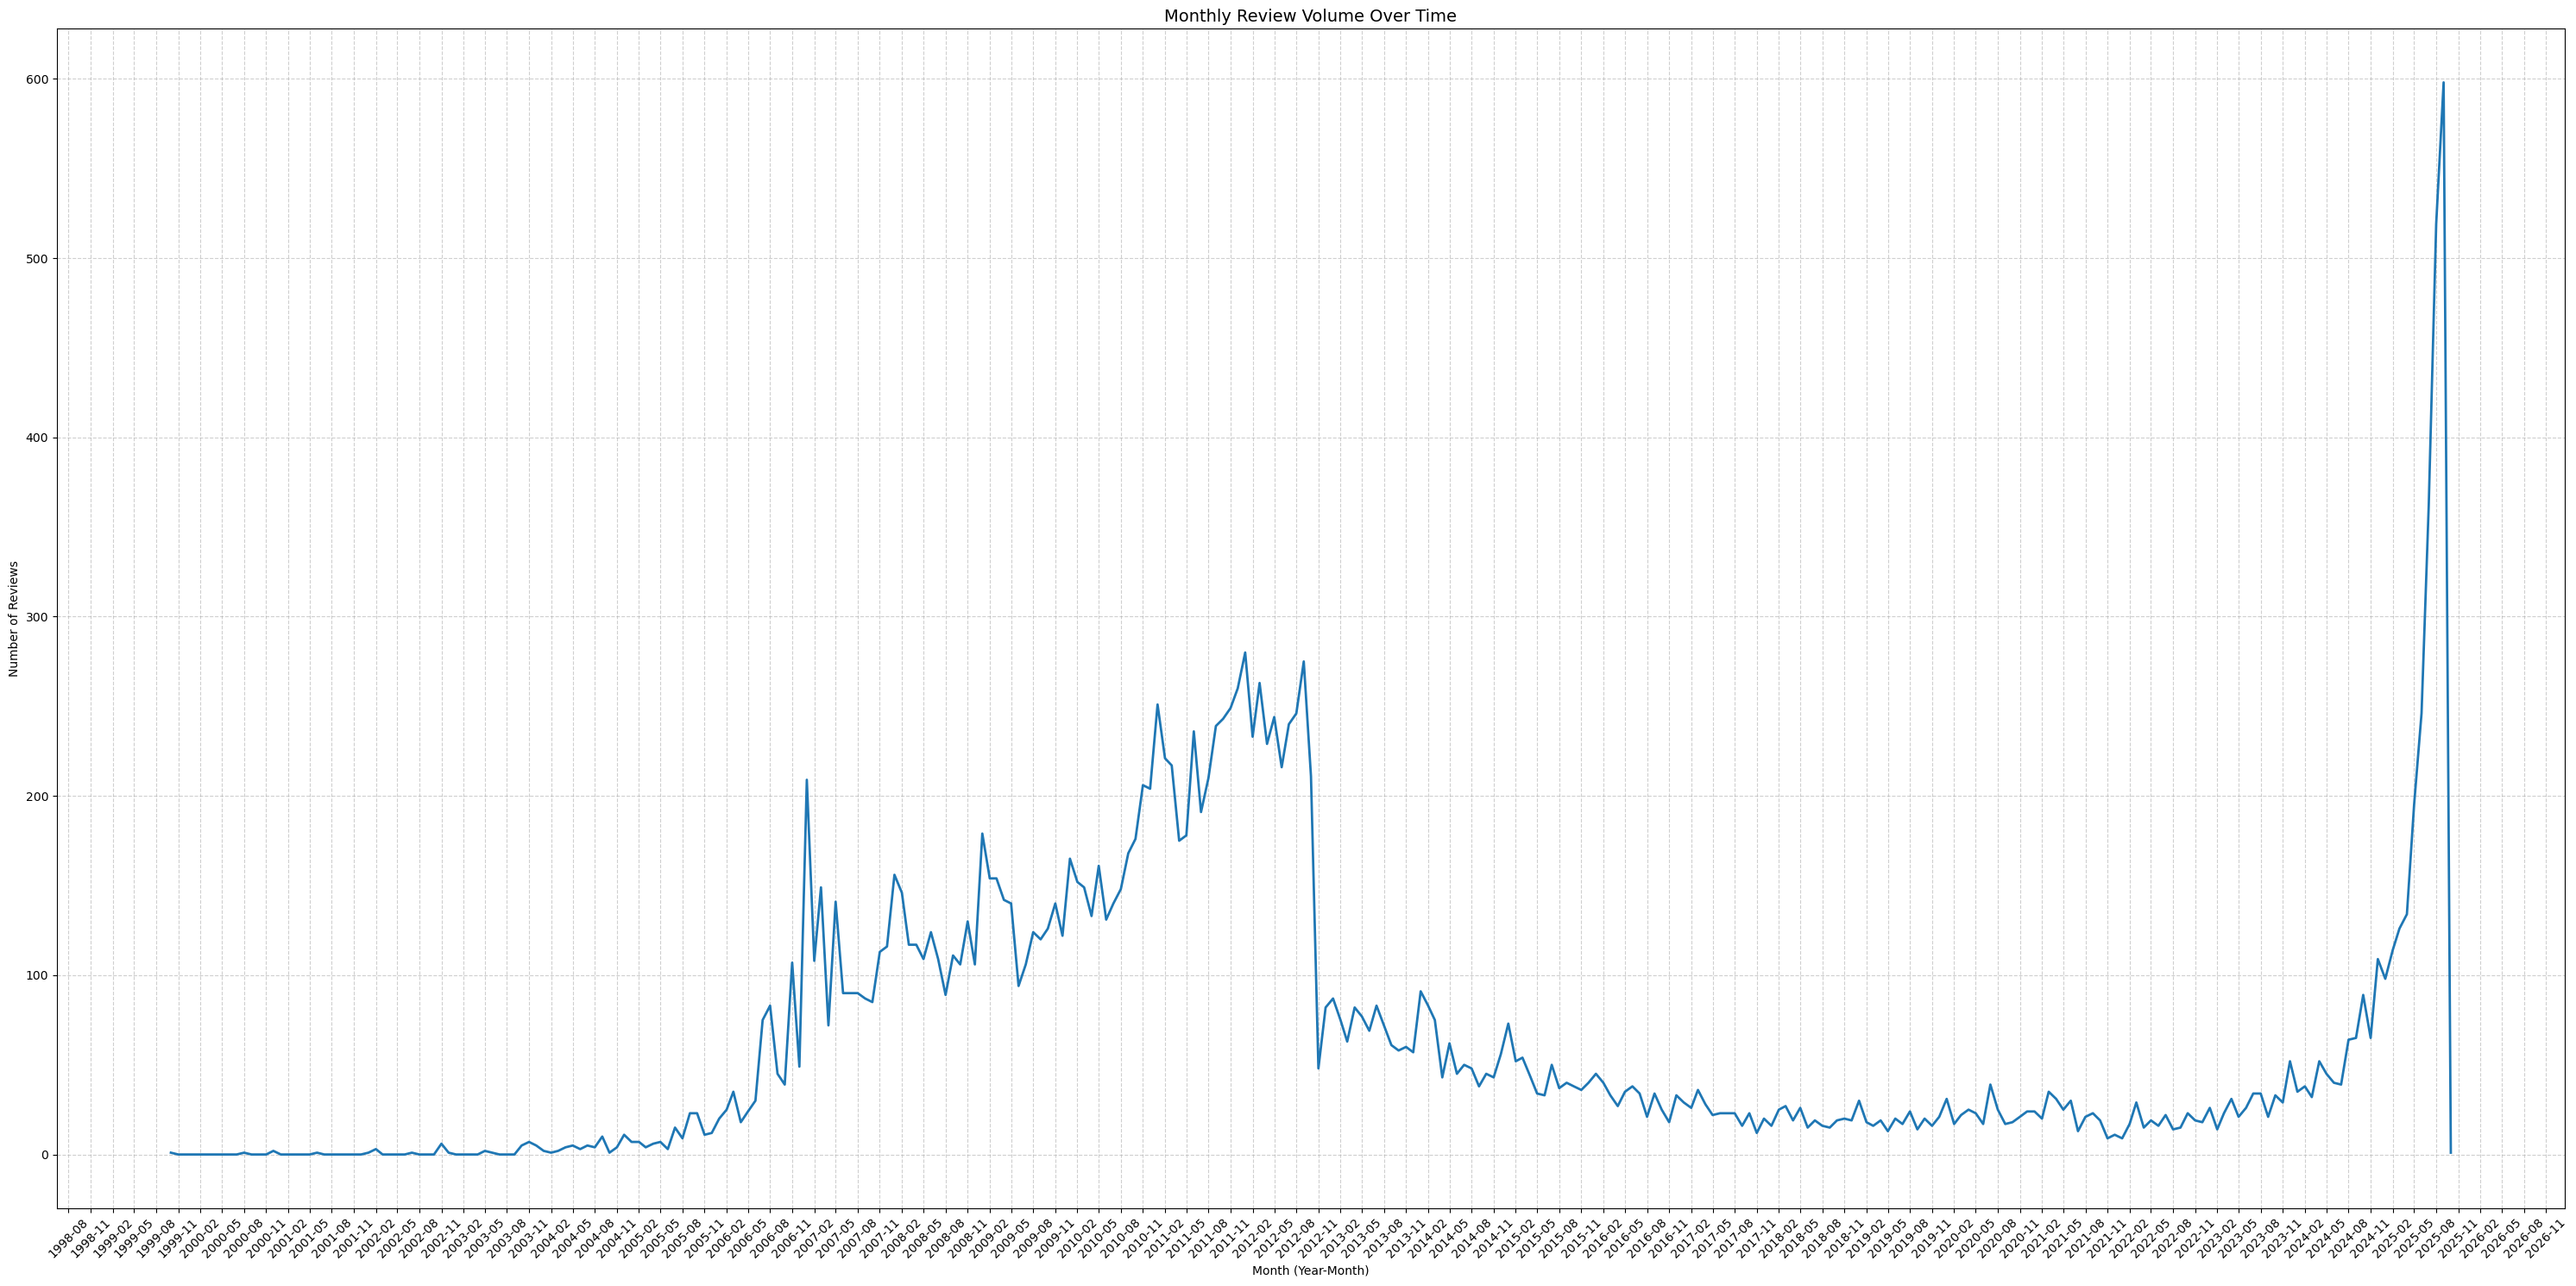

In [113]:
import matplotlib.dates as mdates

# Guard for empty data
if reviews_df.empty or reviews_df['review_date'].isna().all():
    print('No review dates available to plot.')
else:
    # Aggregate counts by month Period
    monthly_series = reviews_df.groupby('month').size()

    # Build continuous monthly index and fill gaps with 0
    month_min = reviews_df['review_date'].dt.to_period('M').min()
    month_max = reviews_df['review_date'].dt.to_period('M').max()
    full_index = pd.period_range(start=month_min, end=month_max, freq='M')
    monthly_series = monthly_series.reindex(full_index, fill_value=0)

    # Prepare DataFrame for plotting
    monthly_reviews = monthly_series.reset_index()
    monthly_reviews.columns = ['month', 'review_count']
    monthly_reviews['month_ts'] = monthly_reviews['month'].dt.to_timestamp()

    plt.figure(figsize=(30,15))
    sns.lineplot(data=monthly_reviews, x='month_ts', y='review_count', color='#1f77b4', linewidth=2)

    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

    plt.title('Monthly Review Volume Over Time', fontsize=14)
    plt.xlabel('Month (Year-Month)')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

Average Rating Trend Over Time

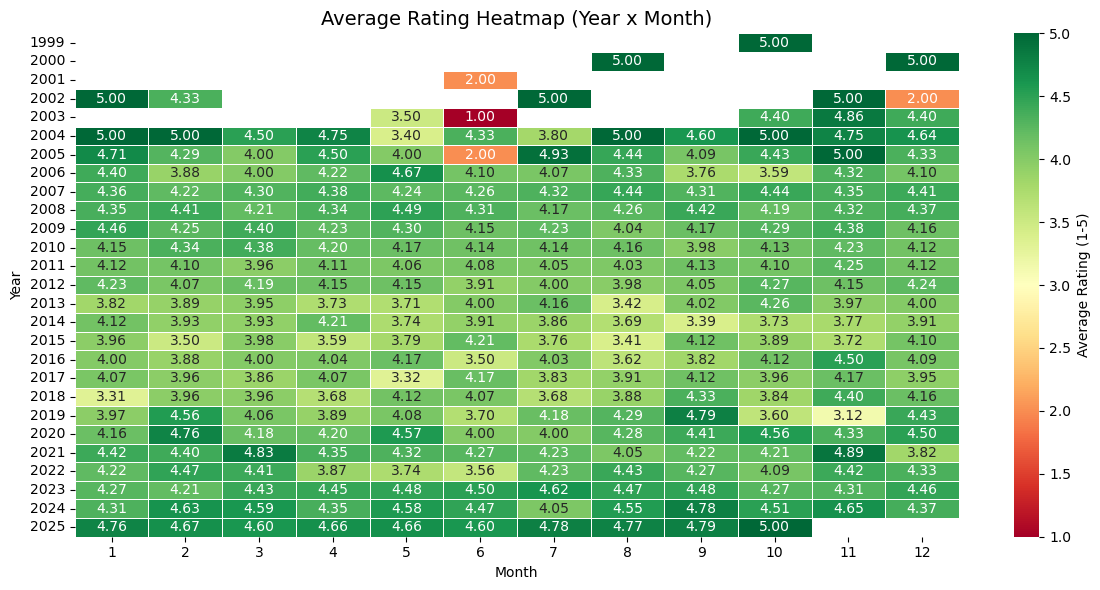

In [121]:
# Rating heatmap: average rating by year x month
# Ensure required columns exist
if 'year' not in reviews_df.columns:
    reviews_df['year'] = reviews_df['review_date'].dt.year
reviews_df['month_num'] = reviews_df['review_date'].dt.month

# Use numeric Score
reviews_df['Score_num'] = pd.to_numeric(reviews_df['Score'], errors='coerce')
valid = reviews_df.dropna(subset=['review_date', 'Score_num']).copy()

if valid.empty:
    print('No valid ratings to build heatmap.')
else:
    rating_heatmap = (valid
        .groupby(['year', 'month_num'])['Score_num']
        .mean()
        .unstack(fill_value=np.nan)
    )
    # Order months 1..12 and years ascending
    month_cols = list(range(1, 13))
    for m in month_cols:
        if m not in rating_heatmap.columns:
            rating_heatmap[m] = np.nan
    rating_heatmap = rating_heatmap[month_cols].sort_index()

    plt.figure(figsize=(12,6))
    sns.heatmap(
        rating_heatmap,
        cmap='RdYlGn',
        vmin=1, vmax=5,
        annot=True,
        fmt='.2f',
        linewidths=0.5,
        cbar_kws={'label': 'Average Rating (1-5)'}
    )
    plt.title('Average Rating Heatmap (Year x Month)', fontsize=14)
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.tight_layout()
    plt.show()

Review Count by Year


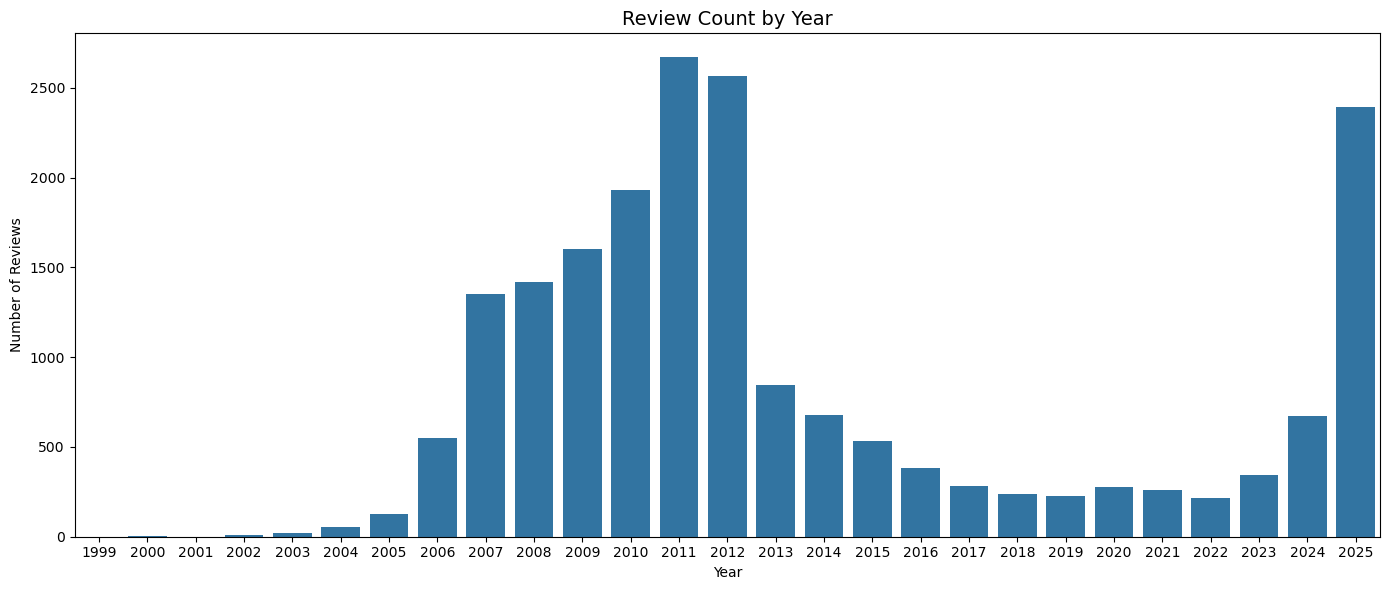

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure review_date and year
if 'review_date' not in reviews_df.columns:
    tmp = df_amazon_food_reviews.copy()
    reviews_df = tmp.copy()
    reviews_df['review_date'] = pd.to_datetime(reviews_df['Time'], errors='coerce', unit='s')
if 'year' not in reviews_df.columns:
    reviews_df['year'] = reviews_df['review_date'].dt.year

valid = reviews_df.dropna(subset=['review_date']).copy()

if valid.empty:
    print('No review dates available to compute yearly counts.')
else:
    year_counts = valid.groupby('year').size().rename('review_count')

    # Fill continuous year range with zeros
    yr_min = int(valid['year'].min())
    yr_max = int(valid['year'].max())
    full_years = pd.Index(range(yr_min, yr_max + 1), name='year')
    year_counts = year_counts.reindex(full_years, fill_value=0)

    plt.figure(figsize=(14,6))
    sns.barplot(x=year_counts.index.astype(int), y=year_counts.values, color='#1f77b4')
    plt.title('Review Count by Year', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
